<a href="https://colab.research.google.com/github/NikhilGurrapu/SVM_non_linear/blob/main/SVM_non_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC

In [20]:
data=pd.read_csv('/content/sample_data/Social_Network_Ads.csv')

In [21]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
X=data.iloc[:,2:4]
X.shape

(400, 2)

In [23]:
y=data.iloc[:,-1]
y.shape

(400,)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
sc=StandardScaler()

In [26]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [27]:
clf=SVC(kernel='rbf',random_state=0)
clf.fit(X_train,y_train)

SVC(random_state=0)

In [28]:
y_pred=clf.predict(X_test)

In [29]:
print("Accuracy: ",(accuracy_score(y_test,y_pred))*100)

Accuracy:  95.83333333333334


In [30]:
confusion_matrix(y_test,y_pred)

array([[69,  4],
       [ 1, 46]])

In [31]:
print("Error Rate: ",(1-accuracy_score(y_test,y_pred))*100)

Error Rate:  4.1666666666666625


In [32]:
from matplotlib.colors import ListedColormap

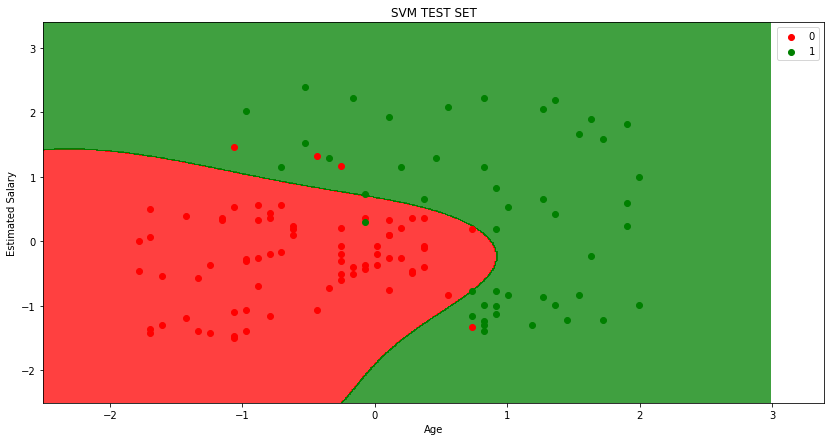

In [33]:
plt.figure(figsize=(14,7))
X_set, y_set = X_test, y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1,step=0.01),
np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1,step=0.01))

plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))

plt.xlim(X1.min(),X2.max())
plt.xlim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],c=ListedColormap (('red','green'))(i), label=j)

plt.title('SVM TEST SET')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()